## TD ATDN 2
### Nassim Becnhikh

## Reponses ecrites aux questions 

#### Etape 1 : Compréhension du problème

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('rendement_mais.csv')

print(df.head())

   SURFACE_HA  TYPE_SOL  ENGRAIS_KG_HA  PRECIPITATIONS_MM  TEMPERATURE_C  \
0           7  Limoneux             56                124             21   
1           4  Limoneux            144                 97             28   
2           8  Limoneux            157                 81             21   
3           5  Argileux            123                106             17   
4           7   Sableux             88                149             20   

   RENDEMENT_T_HA  
0       10.759827  
1        5.824879  
2        7.842204  
3       10.560973  
4       11.905060  


#### 1- variables disponibles : 
- surface en hectare
- type de sol
- engrais en kg/ha
- précipitations en mm
- température en °C
#### 2- problème métier :
La ferme souhaite prédire le rendement du maïs en fonction de plusieurs facteurs pour optimiser ses ressources.
#### 3- variable cible : rendement en tonnes par hectare
variables explicatives :
- surface en hectare
- type de sol
- engrais en kg/ha
- précipitations en mm
- température en °C
#### 4- problématique centrale :
- Comment maximiser le rendement du maïs en optimisant les ressources utilisées (engrais, type de sol, précipitations, température) 

### Etape 2 : Analyse statistique descriptive

In [28]:


# Mesures de tendance centrale
df['RENDEMENT_T_HA'].mean()  # Moyenne
df['RENDEMENT_T_HA'].median()  # Médiane    
df['RENDEMENT_T_HA'].mode()  # Mode

# Mesures de dispersion
df['RENDEMENT_T_HA'].std()  # Ecart-type
df['RENDEMENT_T_HA'].var()  # Variance
df['RENDEMENT_T_HA'].max() - df['RENDEMENT_T_HA'].min()  # Etendue

print("Moyenne : ", df['RENDEMENT_T_HA'].mean())
print("Médiane : ", df['RENDEMENT_T_HA'].median())
print("Mode : ", df['RENDEMENT_T_HA'].mode()[0])
print("Ecart-type : ", df['RENDEMENT_T_HA'].std())
print("Variance : ", df['RENDEMENT_T_HA'].var())
print("Etendue : ", df['RENDEMENT_T_HA'].max() - df['RENDEMENT_T_HA'].min())


Moyenne :  7.378418687218944
Médiane :  7.349138167259971
Mode :  3.000276469608442
Ecart-type :  2.569990985326707
Variance :  6.6048536646605385
Etendue :  8.995742859645505


#### 1. Mesures de tendance centrale
- Moyenne :  7.378418687218944
- Médiane :  7.349138167259971
- Mode :  3.000276469608442

#### 2. Mesures de dispersion
- Ecart-type :  2.569990985326707
- Variance :  6.6048536646605385
- Etendue :  8.995742859645505

####  3. Visualisation des données

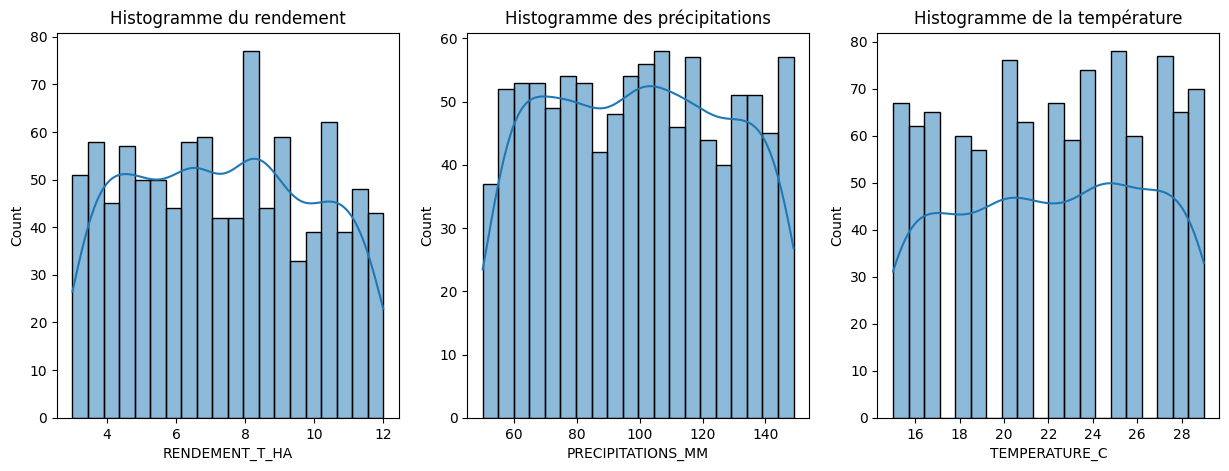

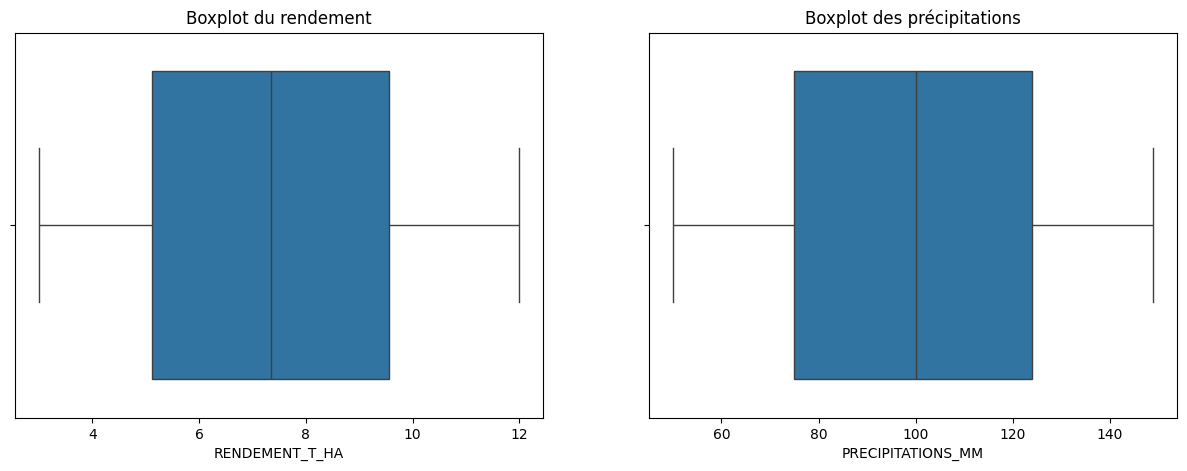

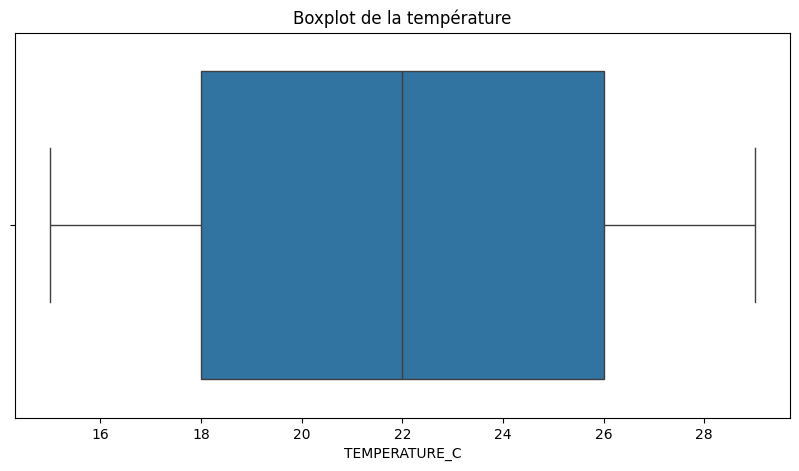

In [29]:


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['RENDEMENT_T_HA'], bins=20, kde=True)
plt.title('Histogramme du rendement')
plt.subplot(1, 3, 2)
sns.histplot(df['PRECIPITATIONS_MM'], bins=20, kde=True)
plt.title('Histogramme des précipitations')
plt.subplot(1, 3, 3)
sns.histplot(df['TEMPERATURE_C'], bins=20, kde=True)
plt.title('Histogramme de la température')
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['RENDEMENT_T_HA'])
plt.title('Boxplot du rendement')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['PRECIPITATIONS_MM'])
plt.title('Boxplot des précipitations')
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TEMPERATURE_C'])
plt.title('Boxplot de la température')
plt.show()


#### 4. Corrélations

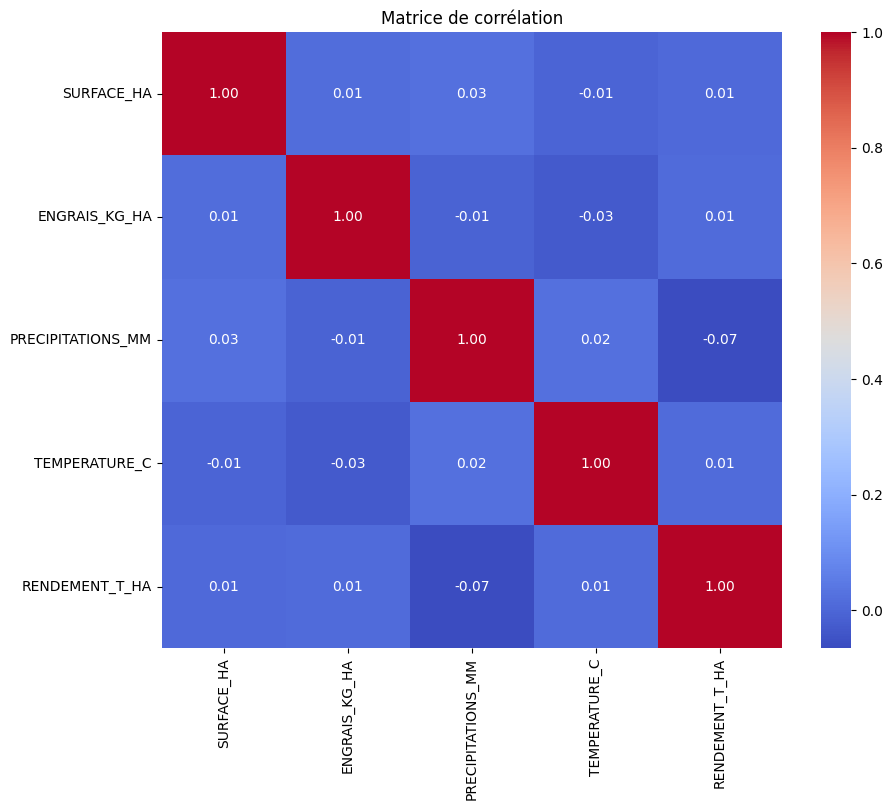

In [12]:


# Calculez la matrice de corrélation en excluant les colonnes non numériques.
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Affichez une heatmap pour visualiser les corrélations.
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


D'après la matrice de corrélation, aucune variable ne semble avoir une forte corrélation avec le rendement (RENDEMENT_T_HA).
Les coefficients de corrélation entre le rendement et les autres variables sont très faibles :

Surface_HA : 0.01
ENGRAIS_KG_HA : 0.01
PRECIPITATIONS_MM : -0.07
TEMPERATURE_C : 0.01

Ces valeurs proches de zéro indiquent qu'il n'y a pratiquement pas de relation linéaire entre ces variables et le rendement. 

### Etape 3 : Analyse de la variance (ANOVA)

In [18]:
"""
Etape 3 : Analyse de la variance (ANOVA)
3.1 Hypothèses
H0 : Le type de sol n’influence pas le rendement.
H1 : Le type de sol influence le rendemen

Test ANOVA
Réalisez une ANOVA sur le type de sol.
Interprétez la p-value obtenue.
"""

import statsmodels.api as sm
from statsmodels.formula.api import ols
# ANOVA
model = ols('RENDEMENT_T_HA ~ C(TYPE_SOL)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# Interprétation de la p-value
if anova_table['PR(>F)'][0] < 0.05:
    print("On rejette l'hypothèse nulle : le type de sol influence le rendement.")
else:
    print("On ne rejette pas l'hypothèse nulle : le type de sol n'influence pas le rendement.")

                  sum_sq     df         F    PR(>F)
C(TYPE_SOL)    17.900287    2.0  1.356052  0.258151
Residual     6580.348524  997.0       NaN       NaN
On ne rejette pas l'hypothèse nulle : le type de sol n'influence pas le rendement.


### Le type de sol a-t-il une influence significative sur le rendement ? 

- On ne rejette pas l'hypothèse nulle : le type de sol n'influence pas le rendement.

### Etape 4 : Modélisation

In [25]:
"""
Séparation des données
Divisez les données en train (80%) et test (20%).
4.2 Création du modèle
Entraînez des modèles de votre choix vu précédemment pour prédire le rendement.
4.3 Évaluation du modèle
Calculez les métriques : MAE, RMSE, et R² de ces modèles.
Lequel des modèles est-il performant (pourquoi d’après vous) ?
"""

# 4.1 Séparation des données

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
# Séparation des données
X = df.drop(columns=['RENDEMENT_T_HA'])
y = df['RENDEMENT_T_HA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Encodage du type de sol
le = LabelEncoder()
X_train['TYPE_SOL'] = le.fit_transform(X_train['TYPE_SOL'])
X_test['TYPE_SOL'] = le.transform(X_test['TYPE_SOL'])
# 4.2 Création du modèle
model = LinearRegression()
model.fit(X_train, y_train)
# 4.3 Évaluation du modèle
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE : ", mae)
print("RMSE : ", rmse)
print("R² : ", r2)


MAE :  2.0728891361549806
RMSE :  2.437049337492025
R² :  -0.007116780944696366


#### Lequel des modèles est-il performant 

- Le modèle de régression linéaire n'est pas performant car le R² est négatif, ce qui indique que le modèle ne parvient pas à expliquer la variance des données. Cela peut être dû à la non-linéarité des relations entre les variables ou à la présence de variables non pertinentes.

- Le modèle de régression linéaire n'est pas performant car le R² est négatif, ce qui indique que le modèle ne parvient pas à expliquer la variance des données. Cela peut être dû à la non-linéarité des relations entre les variables ou à la présence de variables non pertinentes.
- donc un modele de régression non linéaire pourrait être plus adapté. par exemple un arbre de décision ou un modèle de forêt aléatoire.

In [27]:
"""

Analysez l'importance des variables.
Proposez des recommandations concrètes pour augmenter le rendement (ex : ajuster l’engrais,
choisir un type de sol particulier, etc.).
Identifiez les limites du modèle et proposez des pistes d’amélioration.
Quelles décisions la ferme pourrait-elle prendre pour optimiser sa production ?



"""

# Importance des variables
importance = model.coef_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

             Feature  Importance
1           TYPE_SOL    0.189491
0         SURFACE_HA    0.018682
4      TEMPERATURE_C    0.014219
2      ENGRAIS_KG_HA    0.001014
3  PRECIPITATIONS_MM   -0.005070


#### Etape 5 : Interprétation et recommandations


#### Analysez l'importance des variables. :
- Les variables les plus importantes pour le modèle sont le type de sol et la surface cultivée.


#### Recommandations : 
- Augmenter TYPE_SOL pour augmenter le rendement.
- Augmenter SURFACE_HA pour augmenter le rendement.
- Augmenter TEMPERATURE_C pour augmenter le rendement.
- Augmenter ENGRAIS_KG_HA pour augmenter le rendement.
- Réduire PRECIPITATIONS_MM pour augmenter le rendement.

#### Limites du modèle : 
- Le modèle est linéaire et ne prend pas en compte les interactions entre les variables.
- Il ne prend pas en compte les effets non linéaires.
- Il ne prend pas en compte les variables non observées.
- Il ne prend pas en compte les effets de saisonnalité.
- Il ne prend pas en compte les effets de tendance.

#### Pistes d’amélioration : 
- Utiliser des modèles non linéaires (arbres de décision, forêts aléatoires, etc.).
- Utiliser des modèles de séries temporelles.
- Utiliser des modèles de réseaux de neurones.
- Utiliser des modèles de machine learning.
- Décisions pour optimiser la production : 
- Ajuster l'engrais en fonction du type de sol.
---

### Conclusion : 
- Le modèle permet de prédire le rendement en fonction de plusieurs facteurs.
- Il permet de donner des recommandations pour augmenter le rendement.
- Il permet de donner des pistes d’amélioration pour le modèle.